## Leopard/cheetah classifier

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# Unzip the 'leopardscheetahs.zip' file and create 'leopardscheetahs' folder inside 'data'
import zipfile
zip_ref = zipfile.ZipFile('data/leopardsvscheetahs.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Set the path to our new dataset folder
PATH = "data/leopardscheetahs/"
sz=299
# Changing from resnext50 to resnet34 (for speed and as our dataset is small)
arch=resnet34
bs=28

In [3]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
# Removing specified dropout and setting precompute=False to use transformations from first run
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [4]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.336976   0.103539   0.958333  
    1      0.193158   0.049159   0.979167                  
    2      0.145296   0.034021   0.989583                  
    3      0.147499   0.033765   0.989583                  
    4      0.127833   0.032639   0.989583                  



[array([0.03264]), 0.989583338300387]

In [5]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [6]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.155322   0.045405   0.979167  
    1      0.125888   0.024827   0.989583                  
    2      0.114288   0.026053   1.0                       
    3      0.094701   0.020593   1.0                        
    4      0.069818   0.022256   0.989583                   
    5      0.069692   0.019122   1.0                        
    6      0.053622   0.019247   1.0                        
    7      0.054298   0.028982   0.989583                   
    8      0.05562    0.016269   0.989583                   
    9      0.048498   0.015153   0.989583                   
    10     0.034446   0.011166   1.0                        
    11     0.03034    0.009636   1.0                        
    12     0.029681   0.010749   1.0                        
    13     0.036256   0.009135   1.0                        
    14     0.035397   0.006811   1.0                        
    15     0.031494   0.01444    0.989583   

[array([0.00983]), 1.0]

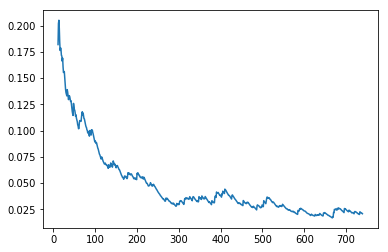

In [7]:
learn.sched.plot_loss()

In [14]:
# Setting our model to CPU mode, as we're going to be running inference on AWS Lambda.
learn.model.cpu()
# Saving our model to "courses/dl1/data/leopardscheetahs/models/leopardscheetahs.h5"
learn.save('leopardscheetahs')